참고 https://www.youtube.com/watch?v=mJTrQfzr0R4

몬테 카를로 시각화 https://patrickstar-jjh.tistory.com/m/14

강화학습 포트폴리오 https://github.com/ZhengyaoJiang/PGPortfolio/blob/master/user_guide.md

포트폴리오 깔끔히 정리된 시각화 https://www.portfoliovisualizer.com/efficient-frontier#analysisResults



In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas>=0.24 in c:\users\juro2022kyungryun\anaconda3\envs\lee\lib\site-packages (from yfinance) (1.3.5)

  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8500 sha256=9f4b34c294a956a1b8a048fba1ec89e3a64b2a69f2de08c51aea2f0815fc8135
  Stored in directory: c:\users\juro2022kyungryun\appdata\local\pip\cache\wheels\21\c9\66\b41c847de65c7985db52ec21d59996841598b8b0e93f2b9500
Successfully built multitasking


In [2]:
import yfinance as yf
import numpy as np

In [3]:
df=yf.download(['AAPL','MSFT'], start="2020-12-01", end="2021-12-29")

[*********************100%***********************]  2 of 2 completed


In [4]:
df = np.log(1 + df['Adj Close'].pct_change()) # 로그 정규화 정규분포에 가깝에 표준화를 시켜줌

In [5]:
df

,AAPL,MSFT
Date,,
2020-11-30,NaN,NaN
2020-12-01,0.030362,0.009947
2020-12-02,0.002929,-0.003893
2020-12-03,-0.001138,-0.005261
2020-12-04,-0.005628,0.000560
...,...,...
2021-12-21,0.018907,0.022807
2021-12-22,0.015203,0.017896
2021-12-23,0.003637,0.004462


Portfolioreturn = 가중치1 * 애플주식의 수익률 + 가중치2 * 마이크로소프트주식의 수익률

In [6]:
weights =[0.5,0.5]

In [7]:
weights[0]*df.AAPL.mean() + weights[1]*df.MSFT.mean()

0.001642558040910418

In [8]:
np.dot(df.mean(), weights) # 대량의 계산을 하기 위해서 numpy를 사용

0.001642558040910418

In [9]:
def portfolioreturn(weights):
  return(np.dot(df.mean(), weights))

In [10]:
portfolioreturn(weights)

0.001642558040910418

Portfoliovariance 
= (가중치1) * 애플주식의위험 + (가중치2) * 마이크로소프트주식의 위험 + 2 * (가중치1) * (가중치2) * 애플, 마이크로포스트주식간의 공분산

In [11]:
df.cov()

,AAPL,MSFT
AAPL,0.000257,0.000138
MSFT,0.000138,0.000170


In [12]:
## 이미 cov에서 공분산이 구해졌기때문에 곱할 필요없음 어차피 AAPL/AAPL의 공분산은 위험의2과 같이 때문에 

In [13]:
pv = weights[0]**2*df.cov().iloc[0,0] + weights[1]**2*df.cov().iloc[1,1]+2*weights[0]*weights[1]*df.cov().iloc[0,1] # pv= portfoliovariance

In [14]:
pv**(1/2)**np.sqrt(250) # 표준편차 standard deviation

0.9998496646417723

In [15]:
#portfoliostd = portfoliostandard deviation
def portfoliostd(weights):
  return(np.dot(np.dot(df.cov(),weights),weights))**(1/2)*np.sqrt(250) # 1년치 daily traing date를 곱해줌 

In [16]:
def weightscreator(df):
  random = np.random.random(len(df.columns)) #데이터 프레임의 수에 맞는 난수형성
  random /= random.sum()
  return random

In [17]:
weightscreator(df)

array([0.3607413, 0.6392587])

In [18]:
returns = []
stds =[]
w=[]

for i in range(500):
  weights = weightscreator(df)
  returns.append(portfolioreturn(weights))
  stds.append(portfoliostd(weights))
  w.append(weights)

In [19]:
returns

[0.0017074298305238358,
 0.001743814757992621,
 0.001683602753381915,
 0.001644253746843795,
 0.001615295200553173,
 0.0017117872443619584,
 0.0015557883916936634,
 0.001694322150339853,
 0.0016555677780689193,
 0.0016225950907343119,
 0.001674610288597753,
 0.001627180689966051,
 0.0017329849440420502,
 0.0017248466152732169,
 0.0016541529775840364,
 0.0017107486443073913,
 0.0016072325815833903,
 0.0016961749538908272,
 0.0016510130631258468,
 0.001647352507187409,
 0.0016706649459295906,
 0.0016250291193866339,
 0.0016497181641662295,
 0.0015382348624758014,
 0.0016280177279442553,
 0.0016432526747046994,
 0.00169241070111687,
 0.0016516919128676951,
 0.0015874765932851352,
 0.0016863734348935408,
 0.0016729633676857707,
 0.0017071101655152653,
 0.0017151400861911584,
 0.0017435204672056634,
 0.0017161284022710508,
 0.0016693607496062399,
 0.0016163607477688525,
 0.0016209732555385345,
 0.0016936437089518468,
 0.0016394410258764262,
 0.0016115270497000145,
 0.0016405649184349897,
 0

In [20]:
stds

[0.2021355898475231,
 0.2050601640962066,
 0.20303470244721208,
 0.2093017261173692,
 0.21745457992659945,
 0.2022130505125014,
 0.24214524155282818,
 0.20235401473807535,
 0.2069087769096695,
 0.21513564456050985,
 0.2039508302560079,
 0.21376776921552684,
 0.2036528890425402,
 0.20289253633381277,
 0.20718256948154384,
 0.20218779246877258,
 0.22021179983821085,
 0.202282051649602,
 0.2078163605365058,
 0.20860040181184322,
 0.2044510522877682,
 0.21440092556316567,
 0.20808817799731072,
 0.25111849647681045,
 0.2135256130734445,
 0.2095356017899674,
 0.202442401591436,
 0.20767629095430545,
 0.22779032647292397,
 0.20281568676115494,
 0.20415239573625257,
 0.20213285548596205,
 0.20232358827478297,
 0.20501602000919417,
 0.20236461418892165,
 0.20462948142143172,
 0.21710543378128902,
 0.21563597479284158,
 0.2023837426349087,
 0.2104584792884017,
 0.21871802166196774,
 0.21018105256184783,
 0.20588136878097874,
 0.20271950553525603,
 0.20223467835693684,
 0.20513879437329458,
 0.21

In [21]:
w

[array([0.20229641, 0.79770359]),
 array([0.03532208, 0.96467792]),
 array([0.31164142, 0.68835858]),
 array([0.49221822, 0.50778178]),
 array([0.6251121, 0.3748879]),
 array([0.18229977, 0.81770023]),
 array([0.89819522, 0.10180478]),
 array([0.26244896, 0.73755104]),
 array([0.44029692, 0.55970308]),
 array([0.59161212, 0.40838788]),
 array([0.3529088, 0.6470912]),
 array([0.57056831, 0.42943169]),
 array([0.08502125, 0.91497875]),
 array([0.12236892, 0.87763108]),
 array([0.44678959, 0.55321041]),
 array([0.18706602, 0.81293398]),
 array([0.66211232, 0.33788768]),
 array([0.25394624, 0.74605376]),
 array([0.461199, 0.538801]),
 array([0.47799768, 0.52200232]),
 array([0.3710144, 0.6289856]),
 array([0.5804421, 0.4195579]),
 array([0.46714143, 0.53285857]),
 array([0.97875024, 0.02124976]),
 array([0.56672705, 0.43327295]),
 array([0.49681225, 0.50318775]),
 array([0.2712208, 0.7287792]),
 array([0.45808368, 0.54191632]),
 array([0.75277466, 0.24722534]),
 array([0.29892646, 0.701073

In [22]:
import matplotlib.pyplot as plt

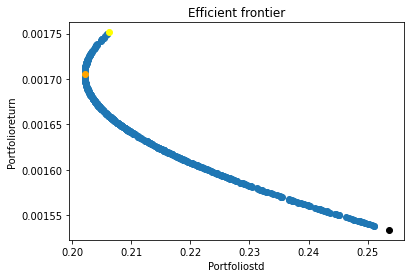

In [23]:
plt.scatter(stds, returns)
plt.scatter(df.std().iloc[0]*np.sqrt(250),df.mean().iloc[0], c='k')
plt.scatter(df.std().iloc[1]*np.sqrt(250),df.mean().iloc[1], c='yellow')
plt.scatter(min(stds), returns[stds.index(min(stds))],c="orange")
plt.title("Efficient frontier")
plt.xlabel("Portfoliostd")
plt.ylabel("Portfolioreturn")
plt.show()